In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import re

from mpl_toolkits.mplot3d import axes3d
from matplotlib import style

%matplotlib inline

In [2]:
train=pd.read_csv('train_values.csv', low_memory=False)
labels=pd.read_csv('train_labels.csv', low_memory=False)

In [3]:
union=train.merge(labels, how='inner', on='building_id')
union.head()

,building_id,geo_level_1_id,geo_level_2_id,geo_level_3_id,count_floors_pre_eq,age,area_percentage,height_percentage,land_surface_condition,foundation_type,...,has_secondary_use_hotel,has_secondary_use_rental,has_secondary_use_institution,has_secondary_use_school,has_secondary_use_industry,has_secondary_use_health_post,has_secondary_use_gov_office,has_secondary_use_use_police,has_secondary_use_other,damage_grade
0,802906,6,487,12198,2,30,6,5,t,r,...,0,0,0,0,0,0,0,0,0,3
1,28830,8,900,2812,2,10,8,7,o,r,...,0,0,0,0,0,0,0,0,0,2
2,94947,21,363,8973,2,10,5,5,t,r,...,0,0,0,0,0,0,0,0,0,3
3,590882,22,418,10694,2,10,6,5,t,r,...,0,0,0,0,0,0,0,0,0,2
4,201944,11,131,1488,3,30,8,9,t,r,...,0,0,0,0,0,0,0,0,0,3


In [4]:
df2=union.rename(columns={'has_superstructure_adobe_mud':'adobe-barro',
                   'has_superstructure_mud_mortar_stone':'barro-piedra',
                   'has_superstructure_stone_flag':'piedra',
                   'has_superstructure_cement_mortar_stone':'cemento-piedra',
                   'has_superstructure_mud_mortar_brick':'barro-ladrillo',
                   'has_superstructure_cement_mortar_brick':'cemento-ladrillos',
                   'has_superstructure_timber':'Timber',
                   'has_superstructure_bamboo':'Bambú',
                   'has_superstructure_rc_non_engineered':'concreto_reforzado_no_diseñado',
                   'has_superstructure_rc_engineered':'concreto_reforzado_diseñado',
                   'has_superstructure_other':'estructura_otro',
                   'has_secondary_use':'uso_secundario',
                   'has_secondary_use_agriculture':'uso_agricultura',
                   'has_secondary_use_hotel':'uso_hotel',
                   'has_secondary_use_rental':'uso_rental',
                    'has_secondary_use_institution':'uso_institucion',
                    'has_secondary_use_school':'uso_escuela',
                    'has_secondary_use_industry':'uso_industrial',
                    'has_secondary_use_health_post':'uso_puesto_de_salud',
                    'has_secondary_use_gov_office':'uso_oficina_de_gobierno',
                    'has_secondary_use_use_police':'uso_estacion_de_policia',
                    'has_secondary_use_other':'uso_de_otros'})

## Analisis material de construccion 

### <font color =blue> ***1. ¿Cual es el material que mas abunda?*** </font>

In [12]:
materiales=df2.loc[:,['adobe-barro','barro-piedra','piedra','cemento-piedra','barro-ladrillo','cemento-ladrillos',
                      'Timber','Bambú','concreto_reforzado_no_diseñado','concreto_reforzado_diseñado','estructura_otro']]

In [13]:
grupo2=materiales.agg(['sum','mean'])
grupo2.T

,sum,mean
adobe-barro,23101.0,0.088645
barro-piedra,198561.0,0.761935
piedra,8947.0,0.034332
cemento-piedra,4752.0,0.018235
barro-ladrillo,17761.0,0.068154
cemento-ladrillos,19615.0,0.075268
Timber,66450.0,0.254988
Bambú,22154.0,0.085011
concreto_reforzado_no_diseñado,11099.0,0.042590
concreto_reforzado_diseñado,4133.0,0.015859


In [16]:
grupo2.T.dtypes

sum     float64
mean    float64
dtype: object

Text(0.5,1,'Cantidad de Materiales')

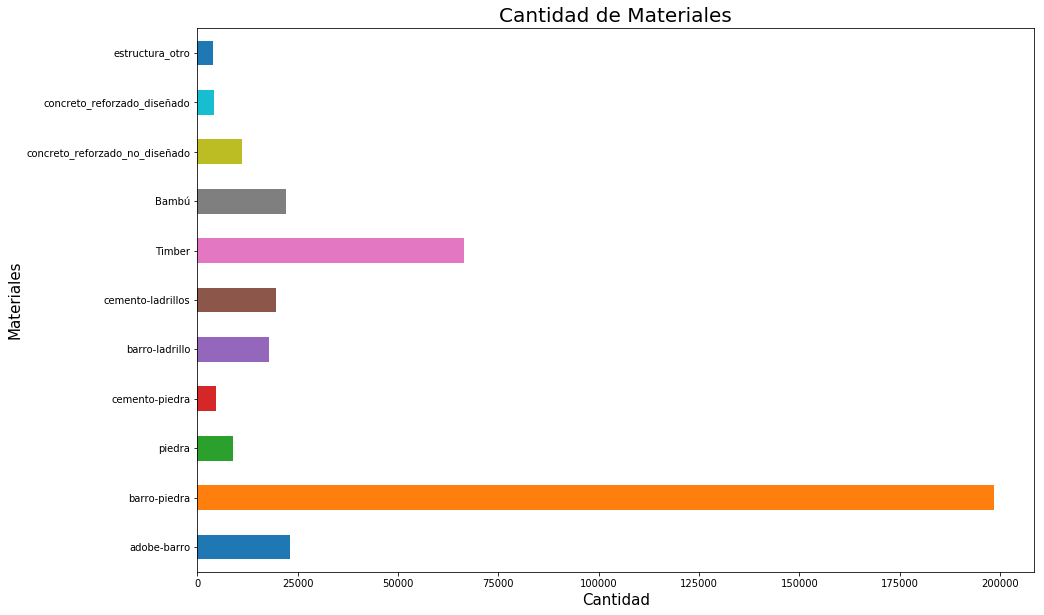

In [17]:
cant_materiales=materiales.agg('sum')

visua= cant_materiales.T.plot.barh(figsize=(15,10))
visua.set_xlabel("Cantidad", fontsize=15)
visua.set_ylabel("Materiales", fontsize=15)
visua.set_title('Cantidad de Materiales', fontsize = 20)


### <font color =blue> ***2. ¿Cual es el material que mas daño sufrio y que grado tuvo?*** </font>



In [27]:
daños_de_materiales=df2.loc[:,['damage_grade','adobe-barro','barro-piedra','piedra','cemento-piedra','barro-ladrillo','cemento-ladrillos',
                      'Timber','Bambú','concreto_reforzado_no_diseñado','concreto_reforzado_diseñado','estructura_otro']]
agrupo=daños_de_materiales.groupby('damage_grade').sum()
agrupo

,adobe-barro,barro-piedra,piedra,cemento-piedra,barro-ladrillo,cemento-ladrillos,Timber,Bambú,concreto_reforzado_no_diseñado,concreto_reforzado_diseñado,estructura_otro
damage_grade,,,,,,,,,,,
1,594,8760,182,829,623,7105,7642,2839,3857,2656,656
2,13902,113947,4534,3248,11698,11421,40187,14001,5832,1402,2248
3,8605,75854,4231,675,5440,1089,18621,5314,1410,75,1001


In [26]:
agrupoT=agrupo.T
agrupoT

damage_grade,1,2,3
adobe-barro,594,13902,8605
barro-piedra,8760,113947,75854
piedra,182,4534,4231
cemento-piedra,829,3248,675
barro-ladrillo,623,11698,5440
cemento-ladrillos,7105,11421,1089
Timber,7642,40187,18621
Bambú,2839,14001,5314
concreto_reforzado_no_diseñado,3857,5832,1410
concreto_reforzado_diseñado,2656,1402,75


Text(0.5,1,'Daño de los distintos Materiales')

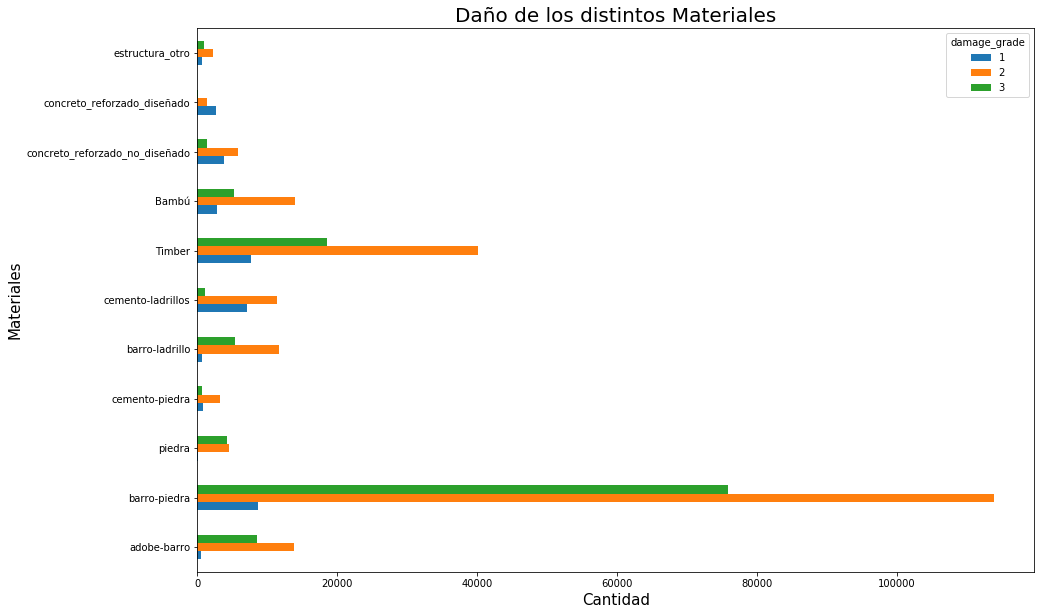

In [22]:
visua2= agrupoT.plot.barh(figsize=(15,10))
visua2.set_xlabel("Cantidad", fontsize=15)
visua2.set_ylabel("Materiales", fontsize=15)
visua2.set_title('Daño de los distintos Materiales', fontsize = 20)

## Anailsis de Edificios

### <font color =blue> ***3.¿Que tipo de edificios existe?*** </font>


### <font color =blue> ***4.¿Esos edificios de que material son?*** </font>

## Analisis de edificios con mayor destruccion 

### <font color =blue> ***5.¿Cuall fue el edificio que mayor destruccion tuvo?*** </font>

### <font color =blue> ***5.1.¿Esos edificios de mayor destruccion de que material son y que cantidad de pisos tenian?*** </font>

### <font color =blue> ***5.2.¿Influye en algo la orientacion?*** </font>

### <font color =blue> ***5.3.¿Influye el tipo de base de piso o techo que tienen?*** </font>

## Analisis de edificios con menor destruccion 

### <font color =blue> ***6.¿Cual fue el edificio que menor destruccion sufrio ?*** </font>

### <font color =blue> ***6.1.¿Esos edificios de menor destruccion de que material son y que cantidad de pisos tenian?*** </font>

### <font color =blue> ***6.2.¿Influye en algo la orientacion?*** </font>

### <font color =blue> ***6.3.¿Influye el tipo de base de piso o techo que tienen?*** </font>